In [2]:
import numpy as np
import pandas as pd

In [3]:
filepath = '/Users/gracegupta/Downloads/NOTEEVENTS.csv'

In [4]:
pd.read_csv(filepath, nrows=2)

ROW_ID  SUBJECT_ID  HADM_ID   CHARTDATE  CHARTTIME  STORETIME  \
0     174       22532   167853  2151-08-04        NaN        NaN   
1     175       13702   107527  2118-06-14        NaN        NaN   

            CATEGORY DESCRIPTION  CGID  ISERROR  \
0  Discharge summary      Report   NaN      NaN   
1  Discharge summary      Report   NaN      NaN   

                                                TEXT  
0  Admission Date:  [**2151-7-16**]       Dischar...  
1  Admission Date:  [**2118-6-2**]       Discharg...

In [5]:
# Look at the first few rows of the CSV file
dtypes = {"ROW_ID": int, "SUBJECT_ID": int, "HADM_ID": float, "CHARTDATE": str, "CHARTTIME": str,
         "STORETIME": str, "CATEGORY": str, "DESCRIPTION": str, "CGID": float, "ISERROR": str, "TEXT": str}
parse_dates = ["CHARTTIME", "STORETIME"]
appended_data = []
chunksize = 10 ** 6
for chunk in pd.read_csv(filepath, dtype = dtypes, parse_dates = parse_dates, chunksize=chunksize):
    appended_data.append(chunk)

In [6]:
appended_data = pd.concat(appended_data)

In [7]:
df = pd.DataFrame(appended_data)
print(df.shape)

(2083180, 11)


In [8]:
df.head()

ROW_ID  SUBJECT_ID   HADM_ID   CHARTDATE CHARTTIME STORETIME  \
0     174       22532  167853.0  2151-08-04       NaT       NaT   
1     175       13702  107527.0  2118-06-14       NaT       NaT   
2     176       13702  167118.0  2119-05-25       NaT       NaT   
3     177       13702  196489.0  2124-08-18       NaT       NaT   
4     178       26880  135453.0  2162-03-25       NaT       NaT   

            CATEGORY DESCRIPTION  CGID ISERROR  \
0  Discharge summary      Report   NaN     NaN   
1  Discharge summary      Report   NaN     NaN   
2  Discharge summary      Report   NaN     NaN   
3  Discharge summary      Report   NaN     NaN   
4  Discharge summary      Report   NaN     NaN   

                                                TEXT  
0  Admission Date:  [**2151-7-16**]       Dischar...  
1  Admission Date:  [**2118-6-2**]       Discharg...  
2  Admission Date:  [**2119-5-4**]              D...  
3  Admission Date:  [**2124-7-21**]              ...  
4  Admission Date:  [**2162-3-3**]              D...

In [9]:
print(df['CATEGORY'].unique())

['Discharge summary' 'Echo' 'ECG' 'Nursing' 'Physician ' 'Rehab Services'
 'Case Management ' 'Respiratory ' 'Nutrition' 'General' 'Social Work'
 'Pharmacy' 'Consult' 'Radiology' 'Nursing/other']


In [10]:
print(df['DESCRIPTION'].unique())

['Report' 'Addendum' 'Nursing Transfer Note' ...
 'PLACE CATH CAROTID/INOM ART' 'L US MSK ASPIRATE/INJ GANGLION CYST LEFT'
 'RO HIP NAILING IN OR W/FILMS & FLUORO RIGHT IN O.R.']


In [11]:
df.isnull().sum()

ROW_ID               0
SUBJECT_ID           0
HADM_ID         231836
CHARTDATE            0
CHARTTIME       316566
STORETIME       836776
CATEGORY             0
DESCRIPTION          0
CGID            836776
ISERROR        2082294
TEXT                 0
dtype: int64

In [47]:
df['CATEGORY'].value_counts() 

Nursing/other        822497
Radiology            522279
Nursing              223556
ECG                  209051
Physician            141624
Discharge summary     59652
Echo                  45794
Respiratory           31739
Nutrition              9418
General                8301
Rehab Services         5431
Social Work            2670
Case Management         967
Pharmacy                103
Consult                  98
Name: CATEGORY, dtype: int64

# Histogram of # notes per category

In [291]:
import sys
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages")
#import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from plotly.offline import *

In [292]:
df['CATEGORY'].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', opacity=0.8,
                                                           title='Number of notes per category', xTitle='Category Name')

Percent notes per category

In [65]:
df["CATEGORY"].value_counts(normalize=True)

Nursing/other        0.394828
Radiology            0.250712
Nursing              0.107315
ECG                  0.100352
Physician            0.067985
Discharge summary    0.028635
Echo                 0.021983
Respiratory          0.015236
Nutrition            0.004521
General              0.003985
Rehab Services       0.002607
Social Work          0.001282
Case Management      0.000464
Pharmacy             0.000049
Consult              0.000047
Name: CATEGORY, dtype: float64

# Error analysis

Null = no error

In [12]:
iserror_nulls = df.loc[df['ISERROR'].isnull()]

In [13]:
len(iserror_nulls)

2082294

Calculate percent of notes containing no errors.

In [17]:
len(iserror_nulls)/len(df) #99.9% are marked as having no error.

0.9995746886970881

Create new dataframe with only notes containing errors.

In [18]:
df_nonull = df.drop(df[df['ISERROR'].isnull()].index)

Count number of notes with errors.

In [19]:
len(df_nonull) #886 notes with errors

886

Most errors come from largest categories.

In [121]:
df_nonull.groupby("CATEGORY")['ISERROR'].count()  

CATEGORY
Case Management      14
General              65
Nursing             374
Nutrition            18
Pharmacy              2
Physician           343
Rehab Services       23
Respiratory          38
Social Work           9
Name: ISERROR, dtype: int64

# Create Random Sample

In [62]:
sample1 = df.sample(frac=0.125, replace=True, random_state=1)

In [63]:
sample1["CATEGORY"].value_counts() #number of notes per category

Nursing/other        102778
Radiology             65434
Nursing               27739
ECG                   26042
Physician             17759
Discharge summary      7491
Echo                   5775
Respiratory            4024
Nutrition              1227
General                 991
Rehab Services          687
Social Work             298
Case Management         124
Pharmacy                 17
Consult                  12
Name: CATEGORY, dtype: int64

In [64]:
sample1["CATEGORY"].value_counts(normalize=True) #percentages are approximately same as population

Nursing/other        0.394696
Radiology            0.251285
Nursing              0.106525
ECG                  0.100008
Physician            0.068199
Discharge summary    0.028768
Echo                 0.022178
Respiratory          0.015453
Nutrition            0.004712
General              0.003806
Rehab Services       0.002638
Social Work          0.001144
Case Management      0.000476
Pharmacy             0.000065
Consult              0.000046
Name: CATEGORY, dtype: float64

# Sentiment Analysis with TextBlob

In [106]:
import sys
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages")
import textblob

In [107]:
from textblob import TextBlob

In [108]:
sample1['sentiment'] = sample1.TEXT.apply(lambda x: TextBlob(str(x)).sentiment.polarity)

Get median sentiment per category

In [117]:
sample1.groupby("CATEGORY")['sentiment'].median()

CATEGORY
Case Management      0.031875
Consult              0.012808
Discharge summary   -0.009448
ECG                 -0.016667
Echo                 0.104274
General              0.000000
Nursing              0.047473
Nursing/other        0.046667
Nutrition            0.032727
Pharmacy             0.044895
Physician           -0.003486
Radiology            0.038889
Rehab Services       0.019253
Respiratory          0.082143
Social Work          0.040295
Name: sentiment, dtype: float64

# Look at whether sentiment varies with description type within categories.

Category: Physician

In [222]:
sample1_phys = sample1.loc[sample1["CATEGORY"]=="Physician "]

Different types of physician notes do not seem to deviate greatly from neutral. 

In [225]:
sample1_phys.groupby("DESCRIPTION")['sentiment'].median() 

DESCRIPTION
Addendum to Housestaff Admission Note                0.008939
Admission - Overnight Intensivist                    0.071014
Admission Note                                      -0.019302
Admission Note - Surgical Critical Care             -0.054577
Arterial Line Insertion Procedure Note               0.125000
Arterial Line Placement                              0.070833
Arterial Line Procedure Note                         0.366667
Attending  Note                                     -0.056250
Attending Admit Note                                 0.068040
Attending Event Note- ARREST and GIB                 0.051984
Attending Note                                       0.078125
Attending Progress Note                              0.022155
Attending Teaching Physician Note                    0.013248
Attending note                                       0.007582
Attending/Physician Resident Progress Note - MICU    0.047719
Bronchoscopy                                        -0.035

Category: Discharge summary

In [234]:
sample1_discharge = sample1.loc[sample1["CATEGORY"]=="Discharge summary"]

Discharge summary addendums are more negative than discharge summary reports.

In [205]:
sample1_discharge.groupby("DESCRIPTION")['sentiment'].median() 

DESCRIPTION
Addendum   -0.296875
Report     -0.004961
Name: sentiment, dtype: float64

Make histogram comparing distributions of sentiment in addendums and reports.

In [289]:
import sys
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages")
#import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from plotly.offline import *

In [280]:
x1 = sample1_discharge.loc[sample1_discharge['DESCRIPTION'] == "Addendum", 'sentiment']
x0 = sample1_discharge.loc[sample1_discharge['DESCRIPTION'] == "Report", 'sentiment']

In [281]:
import plotly.graph_objs as go

trace1 = go.Histogram(
    x=x0, name='Report',
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1, name = 'Addendum',
    opacity=0.75
)

In [290]:
data = [trace1, trace2]
layout = go.Layout(barmode='overlay', title='Sentiment Distribution of Discharge Summaries based on Description Type')
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='overlaid histogram')

Category: ECG

In [207]:
sample1_ecg = sample1.loc[sample1["CATEGORY"]=="ECG"]

In [209]:
sample1_ecg.groupby("DESCRIPTION")['sentiment'].median() 

DESCRIPTION
Report   -0.016667
Name: sentiment, dtype: float64

Approximately normal distribution of notes around neutral.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15b474ba8>]],
      dtype=object)

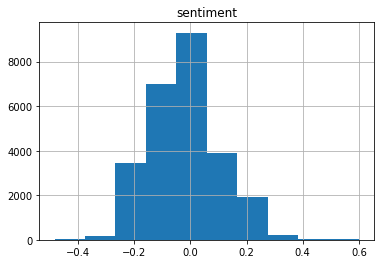

In [210]:
sample1_ecg.hist(column='sentiment')

Category: Radiology

In [217]:
sample1_radiology = sample1.loc[sample1["CATEGORY"]=="Radiology"]

Note types do not appear to deviate greatly from neutral.

In [218]:
sample1_radiology.groupby("DESCRIPTION")['sentiment'].median() 

DESCRIPTION
' FILM ORTHO AP LOWER EXT                               0.050311
-50 BILAT INJ CHOLANG EXIST PERC/TUBE                   0.064435
-PUNCTURE                                               0.000000
1SR ORDER BRANCH VENOUS SYSTEM                          0.122095
1SR ORDER THOR/BRACHIOCEPHALIC                          0.125731
2ND ORDER OR> VENOUS SYSTEM                             0.090288
2ND ORDER THOR/BRACHIOCEPHALIC                          0.088690
3ED ORDER THOR/BRACHIOCEPHALIC                          0.070607
A-GRAM CAROTID/CERVICAL, UNILAT                         0.050000
A/C JOINTS BILAT                                        0.121726
ABD (SINGLE VIEW ONLY)                                  0.018254
ABD COMPL INCLUDING LAT DECUB                          -0.049158
ABDOMEN & PELVIS US                                     0.035577
ABDOMEN (SUPINE & ERECT)                                0.026389
ABDOMEN (SUPINE ONLY)                                   0.021429
ABDOMEN SGL V

Category: Nursing/other

In [153]:
sample1_nursing = sample1.loc[sample1["CATEGORY"]=="Nursing/other"]

In [154]:
sample1_nursing.groupby("DESCRIPTION")['sentiment'].median() 

DESCRIPTION
Report    0.046667
Name: sentiment, dtype: float64

Nursing reports are mostly neutral or above.

In [263]:
import sys
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages")
import plotly
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

sample1_nursing["sentiment"].iplot(
    kind='hist',
    bins=50,
    xTitle='sentiment',
    linecolor='black',
    yTitle='count',
    title='Sentiment Distribution of Reports from Nursing/other')

# Analyze notes with low sentiment

Get nursing notes with low sentiment.

In [260]:
nursing_low_sentiment = sample1_nursing[sample1_nursing.sentiment < -0.5]

Preprocess notes for getting n-grams, word frequencies, etc.

In [159]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocessing(text):
    #tokenize into words
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    
    #remove stopwords
    stopwords = set(nltk.corpus.stopwords.words('english') + ['reuter', '\x03'])
    tokens = [token for token in tokens if token not in stopwords]
    
    #lower capitalization
    tokens = [word.lower() for word in tokens]
    
    #lemmatize
    lmtzr = WordNetLemmatizer()
    tokens = [lmtzr.lemmatize(word) for word in tokens]
    preprocessed_text= ' '.join(tokens)

    return preprocessed_text

In [188]:
processed_text = []
for text in nursing_low_sentiment["TEXT"]:
    processed_text.append(preprocessing(text))

In [161]:
import gensim
processed_text = [text.split() for text in processed_text]

In [162]:
dictionary = gensim.corpora.Dictionary(processed_text)

In [163]:
bow_corpus = [dictionary.doc2bow(text) for text in processed_text];

In [176]:
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                    num_topics = 5, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [177]:
lda_model.print_topics(num_topics=5, num_words=10)

[(0,
  '0.105*":" + 0.052*"[" + 0.052*"]" + 0.051*";" + 0.048*"start" + 0.048*"date" + 0.048*"added" + 0.044*"to" + 0.042*"pathway" + 0.042*"revision"'),
 (1,
  '0.091*"." + 0.061*"," + 0.035*"pt" + 0.019*"bloody" + 0.014*"**" + 0.013*"care" + 0.013*":" + 0.011*"]" + 0.011*"[" + 0.010*"secretion"'),
 (2,
  '0.091*":" + 0.068*"]" + 0.068*"[" + 0.068*";" + 0.067*"start" + 0.067*"added" + 0.067*"date" + 0.031*"alt" + 0.029*"2" + 0.028*"3"'),
 (3,
  '0.022*"." + 0.017*"%" + 0.013*"02" + 0.012*"npn" + 0.011*"sat" + 0.010*")" + 0.010*"(" + 0.010*"@" + 0.010*"**known" + 0.010*"lastname"'),
 (4,
  '0.110*"." + 0.027*":" + 0.027*"[" + 0.027*"]" + 0.021*"**" + 0.016*"resp" + 0.013*"," + 0.011*"(" + 0.011*")" + 0.011*"care"')]

In [184]:
from sklearn.feature_extraction.text import CountVectorizer

In [185]:
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [189]:
get_top_n_words(processed_text, n=40)

[('start', 778),
 ('date', 776),
 ('added', 775),
 ('to', 304),
 ('alt', 296),
 ('revision', 291),
 ('pathway', 291),
 ('fen', 211),
 ('resp', 191),
 ('sepsis', 176),
 ('parenting', 124),
 ('10', 117),
 ('12', 111),
 ('respiratory', 97),
 ('11', 83),
 ('parent', 80),
 ('cv', 74),
 ('potential', 70),
 ('infant', 69),
 ('dev', 69),
 ('development', 66),
 ('bili', 61),
 ('pt', 59),
 ('hyperbilirubinemia', 54),
 ('23', 51),
 ('distress', 49),
 ('term', 48),
 ('hyperbili', 47),
 ('status', 45),
 ('24', 44),
 ('19', 42),
 ('growth', 41),
 ('30', 40),
 ('care', 34),
 ('21', 33),
 ('family', 33),
 ('22', 33),
 ('pot', 32),
 ('bloody', 32),
 ('26', 32)]

In [203]:
processed_text[5]

'1 term respiratory distress 2 fen 3 sepsis 4 developmental 5 parenting revision to pathway : 1 term respiratory distress ; added etiology : transient tachypnea newborn meconium aspiration start date : [ **2102-1-3** ] 2 fen ; added start date : [ **2102-1-3** ] 3 sepsis ; added start date : [ **2102-1-3** ] 4 developmental ; added start date : [ **2102-1-3** ] 5 parenting ; added start date : [ **2102-1-3** ]'

In [190]:
import gensim
from gensim.models import Word2Vec
import multiprocessing

In [191]:
processed_text_split = [text.split() for text in processed_text]

In [192]:
# build vocabulary and train model
model = gensim.models.Word2Vec(
        processed_text_split,
        size=150,
        window=10,
        min_count=2,
        workers=10,
        iter=10)

In [194]:
list(model.wv.vocab);

In [197]:
model.wv.most_similar(positive="respiratory", topn=20)

[('distress', 0.9992078542709351),
 ('term', 0.9991044402122498),
 ('infant', 0.9963061213493347),
 ('**2191-6-30**', 0.9958853721618652),
 ('etiology', 0.9947524070739746),
 ('**2144-6-23**', 0.994400143623352),
 ('transient', 0.9939732551574707),
 ("d/c'd", 0.9935303330421448),
 ('developmental', 0.993424654006958),
 ('tachypnea', 0.9933598041534424),
 ('in', 0.9933580160140991),
 ('aspiration', 0.9933411478996277),
 ('f/e/n', 0.9931755661964417),
 ('status', 0.9927761554718018),
 ('**2105-11-1**', 0.9927406907081604),
 ('meconium', 0.9927401542663574),
 ('cvr', 0.9923598766326904),
 ('fluid', 0.9920266270637512),
 ('cardiovascular', 0.9920263886451721),
 ('newborn', 0.9920243620872498)]

In [235]:
sample1_discharge_addn = sample1_discharge.groupby("DESCRIPTION")

In [238]:
sample1_discharge_addn["DESCRIPTION"].unique()

DESCRIPTION
Addendum    [Addendum]
Report        [Report]
Name: DESCRIPTION, dtype: object

In [296]:
sample1_discharge_addn = sample1_discharge.loc[sample1_discharge["DESCRIPTION"] == "Addendum"]

In [297]:
discharge_addn_negative = sample1_discharge_addn[sample1_discharge_addn.sentiment < -0.4]

In [331]:
processed_discharge_addn = []
for text in discharge_addn_negative["TEXT"]:
    processed_discharge_addn.append(preprocessing(text))

In [248]:
get_top_n_words(processed_discharge_addn, n=40)

[('date', 518),
 ('name', 455),
 ('known', 421),
 ('md', 410),
 ('discharge', 389),
 ('no', 237),
 ('first', 235),
 ('service', 218),
 ('number', 205),
 ('last', 204),
 ('lastname', 190),
 ('allergy', 189),
 ('admission', 184),
 ('unit', 174),
 ('numeric', 171),
 ('identifier', 171),
 ('birth', 171),
 ('sex', 171),
 ('firstname', 169),
 ('addendum', 168),
 ('patient', 155),
 ('lf', 139),
 ('name3', 135),
 ('completed', 132),
 ('attending', 130),
 ('disposition', 130),
 ('10', 120),
 ('facility', 114),
 ('12', 113),
 ('11', 105),
 ('namepattern4', 92),
 ('job', 90),
 ('care', 84),
 ('home', 76),
 ('name8', 74),
 ('un', 70),
 ('name11', 70),
 ('pattern1', 70),
 ('mg', 68),
 ('extended', 68)]

In [293]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [322]:
common_words_nursing = get_top_n_bigram(processed_text, 70)

In [324]:
df_nursing = pd.DataFrame(common_words_nursing, columns = ['Text' , 'count'])

In [326]:
df_nursing

Text  count
0                    start date    775
1                   added start    755
2                   revision to    291
3                    to pathway    291
4                     fen added    102
5                  sepsis added     81
6              potential sepsis     70
7                    resp added     64
8              infant potential     60
9               parenting added     59
10                      alt fen     56
11                     alt resp     52
12             term respiratory     48
13         respiratory distress     48
14                 parent added     40
15           parenting revision     38
16                 pathway resp     38
17                alt parenting     38
18                  pathway alt     36
19                    dev added     34
20            development added     31
21                     resp fen     31
22              parent revision     29
23               pathway infant     29
24                     cv added     28
25     hyperbilirubinemia added     27
26                   bili added     27
27           growth development     27
28                    date 2158     27
29  hyperbilirubinemia revision     25
..                          ...    ...
40            pathway hyperbili     20
41               distress added     20
42               added etiology     20
43           etiology transient     20
44          transient tachypnea     20
45            tachypnea newborn     20
46             newborn meconium     20
47          meconium aspiration     20
48             aspiration start     20
49                    date 2152     20
50                  resp status     20
51                   fen parent     20
52                    date 2162     20
53                 status added     19
54                    resp care     19
55            respiratory added     19
56           hyperbili revision     18
57                    date 2191     18
58                 pathway bili     17
59                    date 2138     17
60                    date 2196     17
61                        12 21     16
62                    cv status     16
63                    date 2126     16
64                   alt growth     16
65          pathway respiratory     16
66                    date 2118     16
67                    date 2157     15
68                      fen dev     15
69                    date 2200     15

[70 rows x 2 columns]

In [327]:
df_nursing[5:25].groupby('Text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='20 top bigrams in Nursing/Other Reports')

In [314]:
common_words = get_top_n_bigram(processed_discharge_addn, 70)

In [315]:
df3 = pd.DataFrame(common_words, columns = ['Text' , 'count'])

In [320]:
df3.iloc[50:70]

Text  count
50                 mg po     34
51         pattern1 last     31
52           name stitle     28
53               by last     27
54       service surgery     24
55       surgery allergy     24
56          addendum the     24
57               md last     23
58    patient discharged     22
59               dr last     22
60    facility hospital3     22
61            allergy no     21
62       allergy adverse     21
63          adverse drug     21
64         drug reaction     21
65    reaction attending     21
66  service neurosurgery     20
67  neurosurgery allergy     19
68     facility location     18
69    facility hospital6     17

In [321]:
df3.iloc[50:70].groupby('Text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='20 top bigrams in Discharge Summary Addendums')

In [334]:
from sklearn.decomposition import TruncatedSVD
reindexed_data = discharge_addn_negative["TEXT"]
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 6
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

In [336]:
from collections import Counter
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)
    
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

def get_top_n_words(n, keys, document_term_matrix, tfidf_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = tfidf_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [337]:
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  date md known
Topic 2:  job 13 2178
Topic 3:  2134 2133 2042
Topic 4:  mg po 2153
Topic 5:  2179 11110 1012
Topic 6:  2187 failure 20


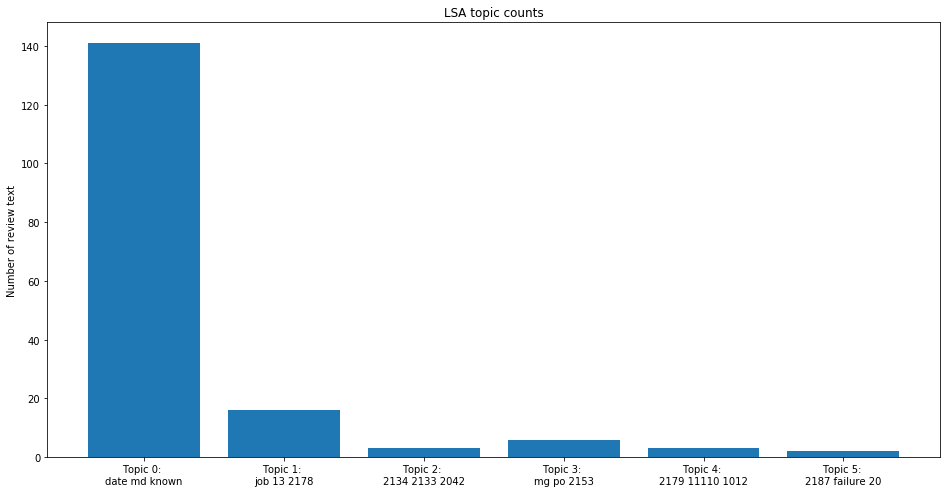

In [339]:
import matplotlib.pyplot as plt

top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of review text');
ax.set_title('LSA topic counts');
plt.show();

In [251]:
import gensim
processed_discharge_addn = [text.split() for text in processed_discharge_addn]

dictionary = gensim.corpora.Dictionary(processed_discharge_addn)

bow_corpus = [dictionary.doc2bow(text) for text in processed_discharge_addn];

lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                    num_topics = 5, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [252]:
lda_model.print_topics(num_topics=5, num_words=10)

[(0,
  '0.094*":" + 0.091*"]" + 0.091*"[" + 0.033*"(" + 0.033*")" + 0.023*"." + 0.022*"date" + 0.018*"name" + 0.016*"discharge" + 0.015*"**known"'),
 (1,
  '0.006*"graft" + 0.006*">" + 0.005*"artery" + 0.005*"vein" + 0.005*"saphenous" + 0.005*"descending" + 0.005*"left" + 0.003*"**2173-9-7**" + 0.003*"**2173-9-2**" + 0.003*"anterior"'),
 (2,
  '0.097*"[" + 0.097*"]" + 0.085*":" + 0.034*")" + 0.034*"(" + 0.020*"date" + 0.018*"**" + 0.018*"name" + 0.018*"." + 0.016*","'),
 (3,
  '0.047*"," + 0.040*"mg" + 0.033*"po" + 0.022*"q" + 0.011*"[" + 0.011*"]" + 0.010*"prn" + 0.010*"bid" + 0.009*":" + 0.008*"day"'),
 (4,
  '0.000*":" + 0.000*"]" + 0.000*"[" + 0.000*"mg" + 0.000*"," + 0.000*")" + 0.000*"." + 0.000*"(" + 0.000*"po" + 0.000*"q"')]